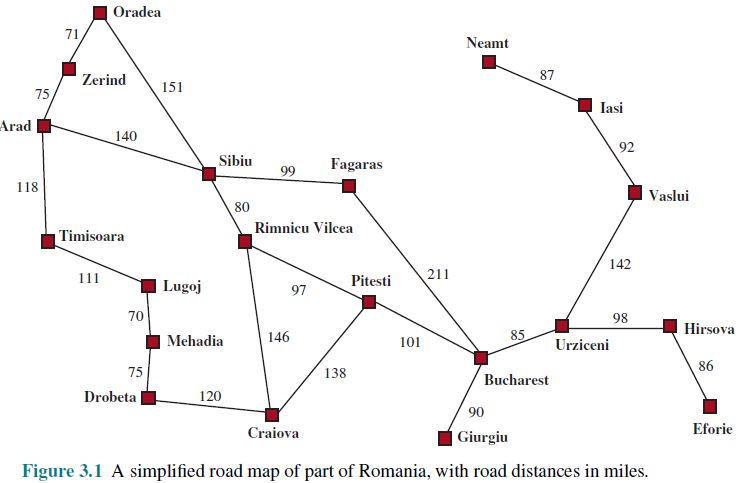

In [1]:
romanian_map = {
    'Arad': {'Sibiu':140, 'Zerind':75, 'Timisoara':118},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

# Uniform Cost Search

In [2]:
from queue import PriorityQueue


def ucs(startingNode, destinationNode):
    expanded = [] # to store expanded nodes
    frontier = PriorityQueue()

    snode = (0,startingNode,[startingNode]) #(g(n) = path cost, city name, path)
    frontier.put(snode)
    
    while not frontier.empty():
        unode = frontier.get() # select a node for expansion
        u = unode[1] 
        if u == destinationNode:# goal test            
            print(unode)
            print(expanded)
            return unode[2] # path
        expanded.append(u)
        for v in romanian_map[u].keys():#expanding            
            if v not in expanded:
                cost = unode[0] + romanian_map[u][v]
                path = unode[2] + [v]
                frontier.put((cost,v,path))
                print(v+ ", Cost: " +str(cost))
    print('Failed')

In [3]:
ucs('Oradea', 'Pitesti') # change source and destination

Zerind, Cost: 71
Sibiu, Cost: 151
Arad, Cost: 146
Sibiu, Cost: 286
Timisoara, Cost: 264
Fagaras, Cost: 250
Rimnicu, Cost: 231
Craiova, Cost: 377
Pitesti, Cost: 328
Bucharest, Cost: 461
Lugoj, Cost: 375
(328, 'Pitesti', ['Oradea', 'Sibiu', 'Rimnicu', 'Pitesti'])
['Oradea', 'Zerind', 'Arad', 'Sibiu', 'Rimnicu', 'Fagaras', 'Timisoara', 'Sibiu']


['Oradea', 'Sibiu', 'Rimnicu', 'Pitesti']

# insert simulation of the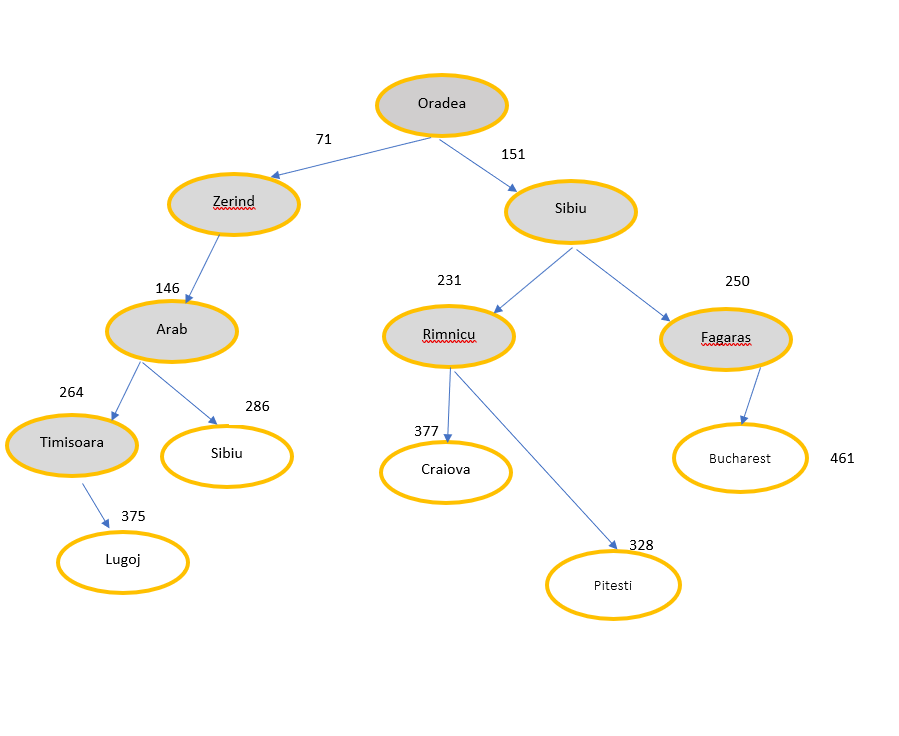 ouput

# Greedy Best First Search

In [4]:
# SLD heuristic for the destination (Bucharest)
h = {'Arad': 366,'Zerind':  374,'Oradea': 380,'Sibiu': 253,
    'Timisoara': 329,'Lugoj': 244,'Mehadia': 241,'Drobeta': 242,
    'Craiova': 160,'Rimnicu': 193,'Fagaras': 176,'Pitesti': 100,
    'Bucharest': 0,'Giurgiu': 77,'Urziceni': 80,'Hirsova': 151,
    'Eforie': 161,'Vaslui': 199,'Iasi': 226,'Neamt': 234
} 

In [5]:
from queue import PriorityQueue

def gbfs(startingNode, destinationNode):
    expanded = [] # to store expanded nodes
    frontier = PriorityQueue()

    snode = (h[startingNode],startingNode,[startingNode],0) # (h, city, path, path cost)
    frontier.put(snode)

    while not frontier.empty():
        unode = frontier.get() 
        u = unode[1]
        
        if u== destinationNode:#Goal Test            
            print(unode)
            print(expanded)
            return unode[2] #path
        expanded.append(u)
        for v in romanian_map[u].keys():            
            if v not in expanded:
                cost = unode[3] + romanian_map[u][v]
                path = unode[2]+[v]
                frontier.put((h[v],v,path, cost))   
    print('Failed')

In [6]:
gbfs('Oradea', 'Pitesti') # change source only

(100, 'Pitesti', ['Oradea', 'Sibiu', 'Fagaras', 'Bucharest', 'Pitesti'], 562)
['Oradea', 'Sibiu', 'Fagaras', 'Bucharest', 'Giurgiu', 'Urziceni']


['Oradea', 'Sibiu', 'Fagaras', 'Bucharest', 'Pitesti']

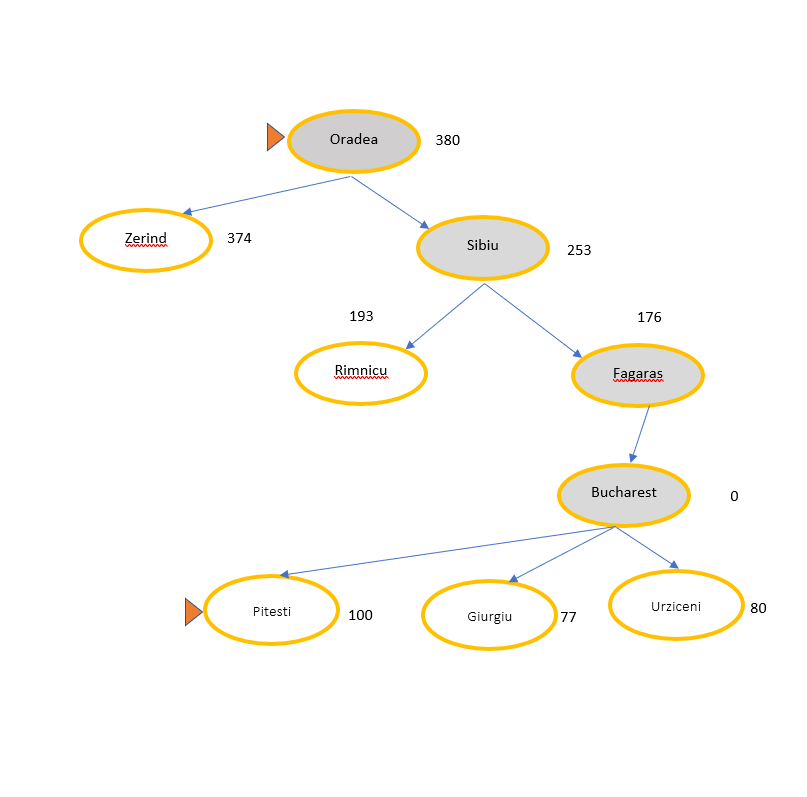# insert simulation of the ouput

# A*

In [14]:
# insert simulation of the ouput